In [261]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.feature_selection as feat_select
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

import graphviz
from graphviz import Graph

import warnings
warnings.filterwarnings("ignore")

import acquire
import explore

In [2]:
#select seaborn color pallete
sns.set_palette('spring')
pal = sns.set_palette('spring')
print(sns.color_palette().as_hex())

['#ff24db', '#ff49b6', '#ff6d92', '#ff926d', '#ffb649', '#ffdb24']


# Plan

### Binary Classification:
This type of classification uses a decision rule to preict an observation to be a member of one of only two groups.  In this case, churn or not churn.

#### How to assess the performance of the model
With classification, it is sometimes irrelevant to use accuracy to assess the performance of a model.
Consider analyzing a highly imbalanced data set. For example, you are trying to determine if a transaction is fraudulent or not, but only 0.5% of your data set contains a fraudulent transaction. Then, you could predict that none of the transactions will be fraudulent, and have a 99.5% accuracy score! Of course, this is a very naive approach that does not help detect fraudulent transactions.
So what do we use?
Usually, we use sensitivity and specificity.
Sensitivity is the true positive rate: the proportions of actual positives correctly identified.
Specificity is the true negative rate: the proportion of actual negatives correctly identified.
Let’s give some context to better understand. Using the fraud detection problem, the sensitivity is the proportion of fraudulent transactions identified as fraudulent. The specificity is the proportion of non-fraudulent transactions identified as non-fraudulent.
Therefore, in an ideal situation, we want both a high sensitivity and specificity, although that might change depending on the context. For example, a bank might want to prioritize a higher sensitivity over specificity to make sure it identifies fraudulent transactions.
The ROC curve (receiver operating characteristic) is good to display the two types of error metrics described above. The overall performance of a classifier is given by the area under the ROC curve (AUC). Ideally, it should hug the upper left corner of the graph, and have an area close to 1.


#### As the target variable is not continuous, binary classification model predicts the probability of a target variable to be Yes/No. To evaluate such a model, a metric called the confusion matrix is used, also called the classification or co-incidence matrix. With the help of a confusion matrix, we can calculate important performance measures:

True Positive Rate (TPR) or Hit Rate or Recall or Sensitivity = TP / (TP + FN)
False Positive Rate(FPR) or False Alarm Rate = 1 - Specificity = 1 - (TN / (TN + FP))
Accuracy = (TP + TN) / (TP + TN + FP + FN)
Error Rate = 1 – accuracy or (FP + FN) / (TP + TN + FP + FN)
Precision = TP / (TP + FP)
F-measure: 2 / ( (1 / Precision) + (1 / Recall) )
ROC (Receiver Operating Characteristics) = plot of FPR vs TPR
AUC (Area Under the Curve)
Kappa statistics

# Step One: Acquire

In [3]:
# Acquire telco churn data from Codeup Database
telco = acquire.new_telco_data()
telco.head()

,customer_id,churn,dependents,device_protection,gender,monthly_charges,multiple_lines,paperless_billing,partner,phone_service,...,streaming_tv,streaming_movies,tech_support,total_charges,internet_service_type_id,internet_service_type,contract_type_id,contract_type,payment_type_id,payment_type
0,0016-QLJIS,No,Yes,Yes,Female,90.45,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,5957.9,1,DSL,3,Two year,2,Mailed check
1,0017-DINOC,No,No,No,Male,45.20,No phone service,No,No,No,...,Yes,No,Yes,2460.55,1,DSL,3,Two year,4,Credit card (automatic)
2,0019-GFNTW,No,No,Yes,Female,45.05,No phone service,No,No,No,...,No,No,Yes,2560.1,1,DSL,3,Two year,3,Bank transfer (automatic)
3,0056-EPFBG,No,Yes,Yes,Male,39.40,No phone service,Yes,Yes,No,...,No,No,Yes,825.4,1,DSL,3,Two year,4,Credit card (automatic)
4,0078-XZMHT,No,No,Yes,Male,85.15,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,6316.2,1,DSL,3,Two year,3,Bank transfer (automatic)


In [4]:
#create CSV
acquire.get_telco_data()

,customer_id,churn,dependents,device_protection,gender,monthly_charges,multiple_lines,paperless_billing,partner,phone_service,...,streaming_tv,streaming_movies,tech_support,total_charges,internet_service_type_id,internet_service_type,contract_type_id,contract_type,payment_type_id,payment_type
0,0016-QLJIS,No,Yes,Yes,Female,90.45,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,5957.9,1,DSL,3,Two year,2,Mailed check
1,0017-DINOC,No,No,No,Male,45.20,No phone service,No,No,No,...,Yes,No,Yes,2460.55,1,DSL,3,Two year,4,Credit card (automatic)
2,0019-GFNTW,No,No,Yes,Female,45.05,No phone service,No,No,No,...,No,No,Yes,2560.1,1,DSL,3,Two year,3,Bank transfer (automatic)
3,0056-EPFBG,No,Yes,Yes,Male,39.40,No phone service,Yes,Yes,No,...,No,No,Yes,825.4,1,DSL,3,Two year,4,Credit card (automatic)
4,0078-XZMHT,No,No,Yes,Male,85.15,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,6316.2,1,DSL,3,Two year,3,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9962-BFPDU,No,Yes,No internet service,Female,20.05,No,No,Yes,Yes,...,No internet service,No internet service,No internet service,20.05,3,None,1,Month-to-month,2,Mailed check
7039,9967-ATRFS,No,No,No internet service,Female,19.90,No,No,No,Yes,...,No internet service,No internet service,No internet service,367.55,3,None,1,Month-to-month,2,Mailed check
7040,9970-QBCDA,No,No,No internet service,Female,19.70,No,No,No,Yes,...,No internet service,No internet service,No internet service,129.55,3,None,1,Month-to-month,4,Credit card (automatic)
7041,9975-SKRNR,No,No,No internet service,Male,18.90,No,No,No,Yes,...,No internet service,No internet service,No internet service,18.9,3,None,1,Month-to-month,2,Mailed check


In [5]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   churn                     7043 non-null   object 
 2   dependents                7043 non-null   object 
 3   device_protection         7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   monthly_charges           7043 non-null   float64
 6   multiple_lines            7043 non-null   object 
 7   paperless_billing         7043 non-null   object 
 8   partner                   7043 non-null   object 
 9   phone_service             7043 non-null   object 
 10  tenure                    7043 non-null   int64  
 11  online_backup             7043 non-null   object 
 12  online_security           7043 non-null   object 
 13  senior_citizen            7043 non-null   int64  
 14  streamin

In [6]:
telco.columns

Index(['customer_id', 'churn', 'dependents', 'device_protection', 'gender',
       'monthly_charges', 'multiple_lines', 'paperless_billing', 'partner',
       'phone_service', 'tenure', 'online_backup', 'online_security',
       'senior_citizen', 'streaming_tv', 'streaming_movies', 'tech_support',
       'total_charges', 'internet_service_type_id', 'internet_service_type',
       'contract_type_id', 'contract_type', 'payment_type_id', 'payment_type'],
      dtype='object')

In [7]:
telco.describe()

,monthly_charges,tenure,senior_citizen,internet_service_type_id,contract_type_id,payment_type_id
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,64.761692,32.371149,0.162147,1.872923,1.690473,2.315633
std,30.090047,24.559481,0.368612,0.737796,0.833755,1.148907
min,18.250000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,35.500000,9.000000,0.000000,1.000000,1.000000,1.000000
50%,70.350000,29.000000,0.000000,2.000000,1.000000,2.000000
75%,89.850000,55.000000,0.000000,2.000000,2.000000,3.000000
max,118.750000,72.000000,1.000000,3.000000,3.000000,4.000000


array([[<AxesSubplot:title={'center':'monthly_charges'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'senior_citizen'}>,
        <AxesSubplot:title={'center':'internet_service_type_id'}>],
       [<AxesSubplot:title={'center':'contract_type_id'}>,
        <AxesSubplot:title={'center':'payment_type_id'}>]], dtype=object)

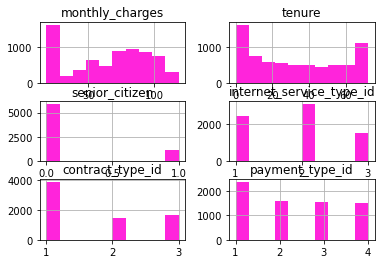

In [8]:
telco.hist()

In [9]:
#explore nulls in total_charges
telco.total_charges.value_counts()

           11
20.2       11
19.75       9
19.65       8
19.9        8
           ..
7337.55     1
198         1
6126.15     1
7113.75     1
1244.5      1
Name: total_charges, Length: 6531, dtype: int64

In [10]:
#Explore null values to determine plan.
telco[telco['total_charges'].str.contains(' ')]

,customer_id,churn,dependents,device_protection,gender,monthly_charges,multiple_lines,paperless_billing,partner,phone_service,...,streaming_tv,streaming_movies,tech_support,total_charges,internet_service_type_id,internet_service_type,contract_type_id,contract_type,payment_type_id,payment_type
85,1371-DWPAZ,No,Yes,Yes,Female,56.05,No phone service,No,Yes,No,...,Yes,No,Yes,,1,DSL,3,Two year,4,Credit card (automatic)
156,2775-SEFEE,No,Yes,No,Male,61.90,Yes,Yes,No,Yes,...,No,No,Yes,,1,DSL,3,Two year,3,Bank transfer (automatic)
236,4075-WKNIU,No,Yes,Yes,Female,73.35,Yes,No,Yes,Yes,...,Yes,No,Yes,,1,DSL,3,Two year,2,Mailed check
255,4472-LVYGI,No,Yes,Yes,Female,52.55,No phone service,Yes,Yes,No,...,Yes,No,Yes,,1,DSL,3,Two year,3,Bank transfer (automatic)
339,5709-LVOEQ,No,Yes,Yes,Female,80.85,No,No,Yes,Yes,...,Yes,Yes,No,,1,DSL,3,Two year,2,Mailed check
5681,2520-SGTTA,No,Yes,No internet service,Female,20.00,No,No,Yes,Yes,...,No internet service,No internet service,No internet service,,3,None,3,Two year,2,Mailed check
5717,3115-CZMZD,No,Yes,No internet service,Male,20.25,No,No,No,Yes,...,No internet service,No internet service,No internet service,,3,None,3,Two year,2,Mailed check
5727,3213-VVOLG,No,Yes,No internet service,Male,25.35,Yes,No,Yes,Yes,...,No internet service,No internet service,No internet service,,3,None,3,Two year,2,Mailed check
5798,4367-NUYAO,No,Yes,No internet service,Male,25.75,Yes,No,Yes,Yes,...,No internet service,No internet service,No internet service,,3,None,3,Two year,2,Mailed check
6007,7644-OMVMY,No,Yes,No internet service,Male,19.85,No,No,Yes,Yes,...,No internet service,No internet service,No internet service,,3,None,3,Two year,2,Mailed check


array([[<AxesSubplot:title={'center':'monthly_charges'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'senior_citizen'}>,
        <AxesSubplot:title={'center':'internet_service_type_id'}>],
       [<AxesSubplot:title={'center':'contract_type_id'}>,
        <AxesSubplot:title={'center':'payment_type_id'}>]], dtype=object)

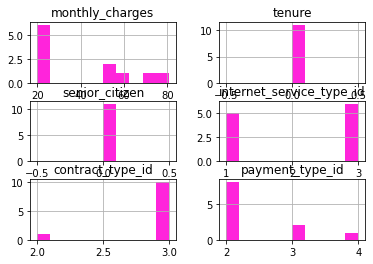

In [11]:
#view distribution of nulls
telco[telco['total_charges'].str.contains(' ')].hist()

In [324]:
telco.churn

0        No
1        No
2        No
3        No
4        No
       ... 
7038     No
7039     No
7040     No
7041     No
7042    Yes
Name: churn, Length: 7043, dtype: object

In [12]:
telco.isna().sum()

customer_id                 0
churn                       0
dependents                  0
device_protection           0
gender                      0
monthly_charges             0
multiple_lines              0
paperless_billing           0
partner                     0
phone_service               0
tenure                      0
online_backup               0
online_security             0
senior_citizen              0
streaming_tv                0
streaming_movies            0
tech_support                0
total_charges               0
internet_service_type_id    0
internet_service_type       0
contract_type_id            0
contract_type               0
payment_type_id             0
payment_type                0
dtype: int64

#### Null exploration take aways:
- tenure of all null values is zero.  This means they are in their first month of service.
- Based on this information, I will replace the nulls with zero.

#### Handle Empty Values

In [13]:
# Change data typt to floats
telco.total_charges = pd.to_numeric(telco.total_charges, errors='coerce').astype('float64')

In [14]:
#verify dtype has changed
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   churn                     7043 non-null   object 
 2   dependents                7043 non-null   object 
 3   device_protection         7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   monthly_charges           7043 non-null   float64
 6   multiple_lines            7043 non-null   object 
 7   paperless_billing         7043 non-null   object 
 8   partner                   7043 non-null   object 
 9   phone_service             7043 non-null   object 
 10  tenure                    7043 non-null   int64  
 11  online_backup             7043 non-null   object 
 12  online_security           7043 non-null   object 
 13  senior_citizen            7043 non-null   int64  
 14  streamin

In [15]:
#The 11 records should now appear as nulls
telco.isna().sum()

customer_id                  0
churn                        0
dependents                   0
device_protection            0
gender                       0
monthly_charges              0
multiple_lines               0
paperless_billing            0
partner                      0
phone_service                0
tenure                       0
online_backup                0
online_security              0
senior_citizen               0
streaming_tv                 0
streaming_movies             0
tech_support                 0
total_charges               11
internet_service_type_id     0
internet_service_type        0
contract_type_id             0
contract_type                0
payment_type_id              0
payment_type                 0
dtype: int64

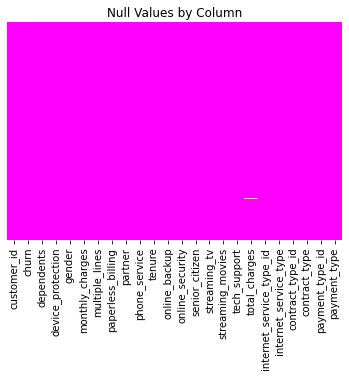

In [16]:
sns.heatmap(telco.isna(), yticklabels = False, cbar = False, cmap='spring')

plt.title('Null Values by Column')
plt.show()

In [17]:
# Replace rows with no value in the total_charges column
telco.total_charges = telco.total_charges.fillna(value="0")

In [18]:
#verify nulls have been replaced
telco.isna().sum()

customer_id                 0
churn                       0
dependents                  0
device_protection           0
gender                      0
monthly_charges             0
multiple_lines              0
paperless_billing           0
partner                     0
phone_service               0
tenure                      0
online_backup               0
online_security             0
senior_citizen              0
streaming_tv                0
streaming_movies            0
tech_support                0
total_charges               0
internet_service_type_id    0
internet_service_type       0
contract_type_id            0
contract_type               0
payment_type_id             0
payment_type                0
dtype: int64

In [19]:
#telco.churn = (telco.churn == 'Yes').astype(int)
#telco.churn.value_counts()

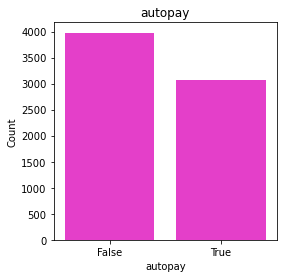

       autopay  Count  Percent
False    False   3977    56.47
True      True   3066    43.53
_________________________________________________________________


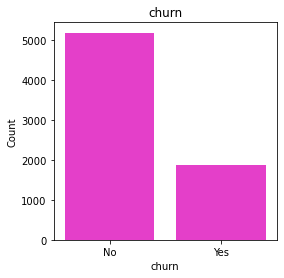

    churn  Count  Percent
No     No   5174    73.46
Yes   Yes   1869    26.54
_________________________________________________________________


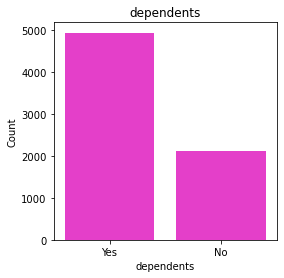

    dependents  Count  Percent
No         Yes   4933    70.04
Yes         No   2110    29.96
_________________________________________________________________


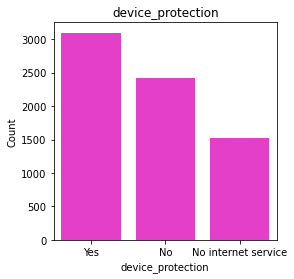

                       device_protection  Count  Percent
No                                   Yes   3095    43.94
Yes                                   No   2422    34.39
No internet service  No internet service   1526    21.67
_________________________________________________________________


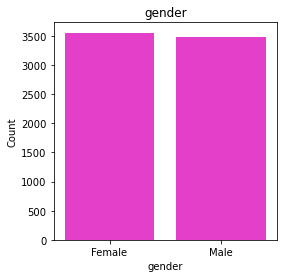

        gender  Count  Percent
Male    Female   3555    50.48
Female    Male   3488    49.52
_________________________________________________________________


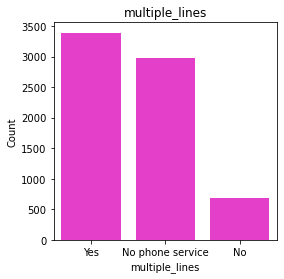

                    multiple_lines  Count  Percent
No                             Yes   3390    48.13
Yes               No phone service   2971    42.18
No phone service                No    682     9.68
_________________________________________________________________


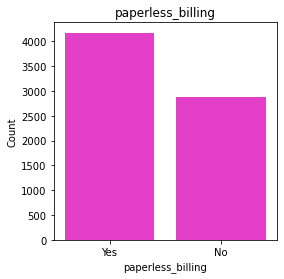

    paperless_billing  Count  Percent
Yes               Yes   4171    59.22
No                 No   2872    40.78
_________________________________________________________________


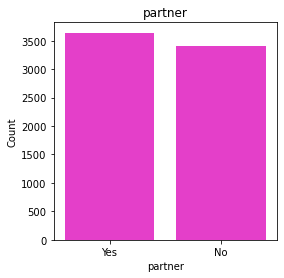

    partner  Count  Percent
No      Yes   3641     51.7
Yes      No   3402     48.3
_________________________________________________________________


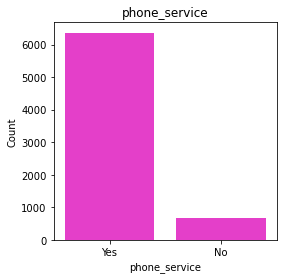

    phone_service  Count  Percent
Yes           Yes   6361    90.32
No             No    682     9.68
_________________________________________________________________


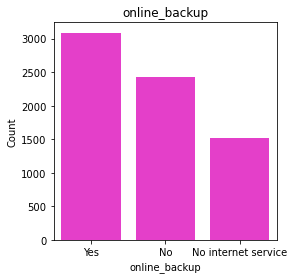

                           online_backup  Count  Percent
No                                   Yes   3088    43.84
Yes                                   No   2429    34.49
No internet service  No internet service   1526    21.67
_________________________________________________________________


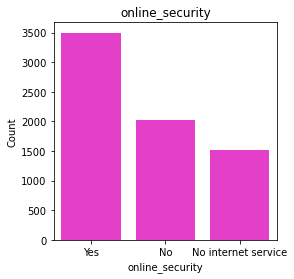

                         online_security  Count  Percent
No                                   Yes   3498    49.67
Yes                                   No   2019    28.67
No internet service  No internet service   1526    21.67
_________________________________________________________________


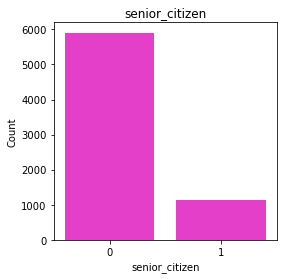

   senior_citizen  Count  Percent
0               0   5901    83.79
1               1   1142    16.21
_________________________________________________________________


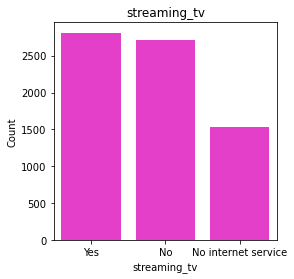

                            streaming_tv  Count  Percent
No                                   Yes   2810    39.90
Yes                                   No   2707    38.44
No internet service  No internet service   1526    21.67
_________________________________________________________________


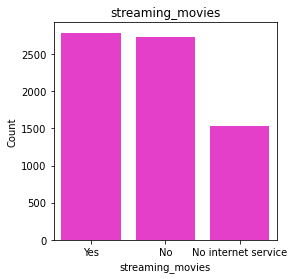

                        streaming_movies  Count  Percent
No                                   Yes   2785    39.54
Yes                                   No   2732    38.79
No internet service  No internet service   1526    21.67
_________________________________________________________________


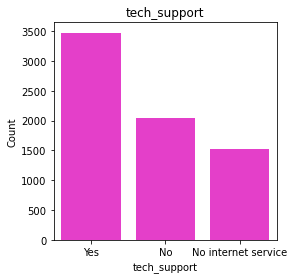

                            tech_support  Count  Percent
No                                   Yes   3473    49.31
Yes                                   No   2044    29.02
No internet service  No internet service   1526    21.67
_________________________________________________________________


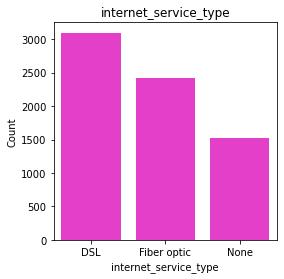

            internet_service_type  Count  Percent
Fiber optic                   DSL   3096    43.96
DSL                   Fiber optic   2421    34.37
None                         None   1526    21.67
_________________________________________________________________


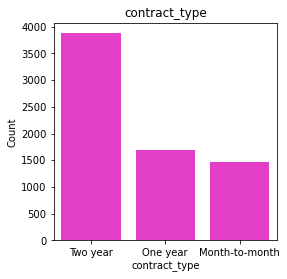

                 contract_type  Count  Percent
Month-to-month        Two year   3875    55.02
Two year              One year   1695    24.07
One year        Month-to-month   1473    20.91
_________________________________________________________________


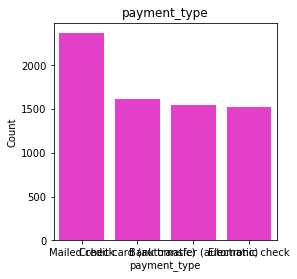

                                        payment_type  Count  Percent
Electronic check                        Mailed check   2365    33.58
Mailed check                 Credit card (automatic)   1612    22.89
Bank transfer (automatic)  Bank transfer (automatic)   1544    21.92
Credit card (automatic)             Electronic check   1522    21.61
_________________________________________________________________


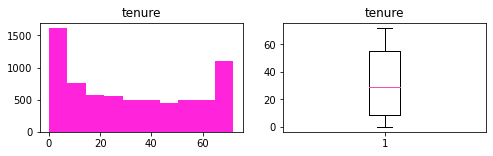

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


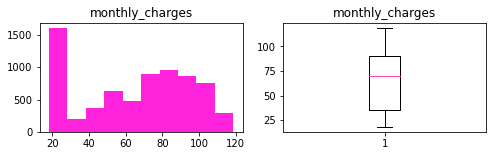

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthly_charges, dtype: float64


TypeError: '<=' not supported between instances of 'float' and 'str'

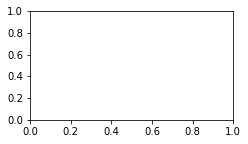

In [48]:
#do initial univariate explore before splitting.  Function does not work properly before split, but still able to see some information.
cat_vars = ['autopay', 'churn', 'dependents', 'device_protection', 'gender', 'multiple_lines', 'paperless_billing', 'partner', 'phone_service', 'online_backup', 'online_security', 'senior_citizen','streaming_tv','streaming_movies','tech_support','internet_service_type','contract_type','payment_type']
quant_vars = ['tenure', 'monthly_charges', 'total_charges']
explore.explore_univariate(telco, cat_vars, quant_vars)

In [31]:
# function to plot counts all the object columns 
def plot_counts(df):
    for col in df.columns:
        # skip over customer ID
        if col == 'customer_id':
            continue
        if df[col].dtype == 'object':
            plt.figure(figsize=(8,6))
            sns.countplot(df[col])
            plt.title(f'{col} counts')
            plt.show()

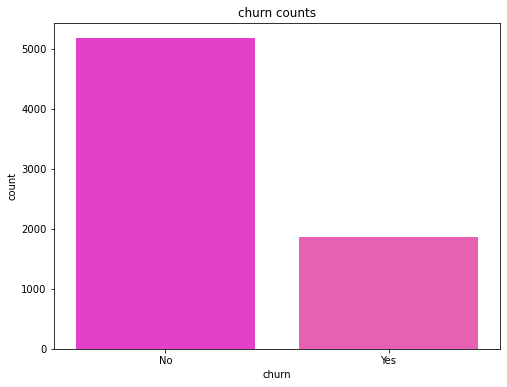

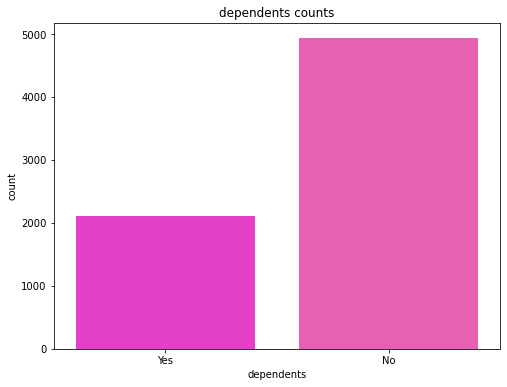

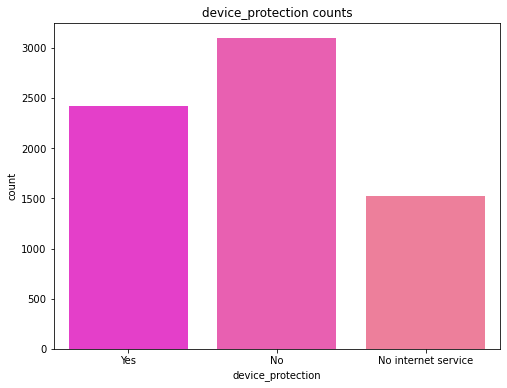

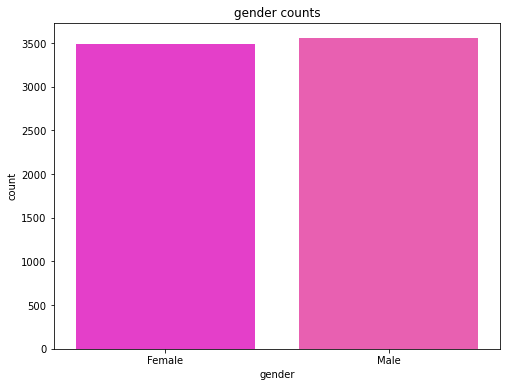

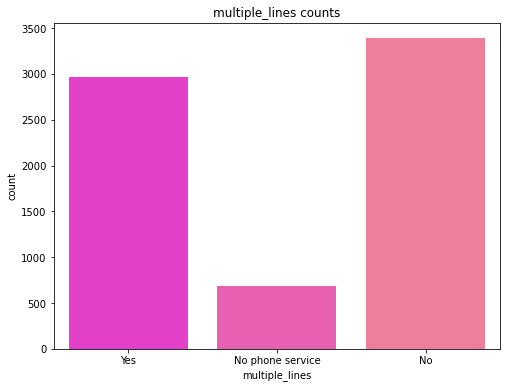

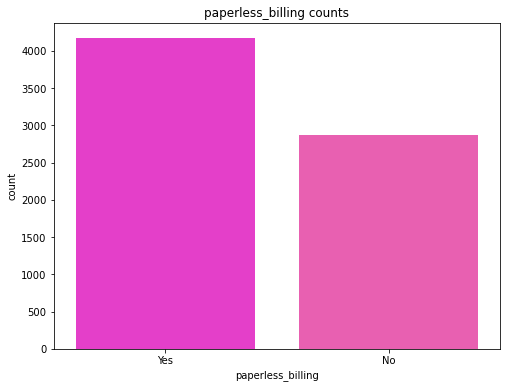

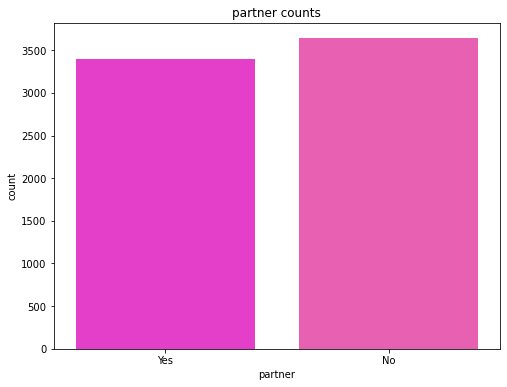

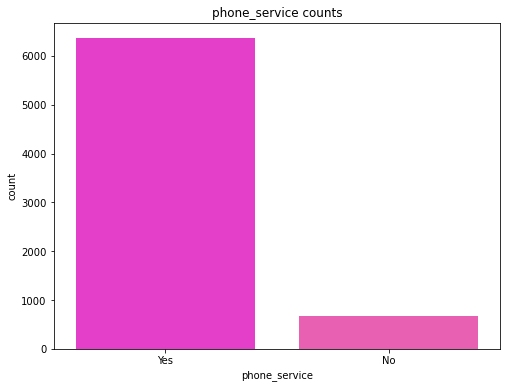

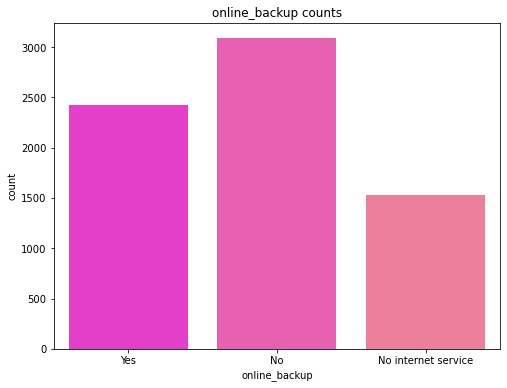

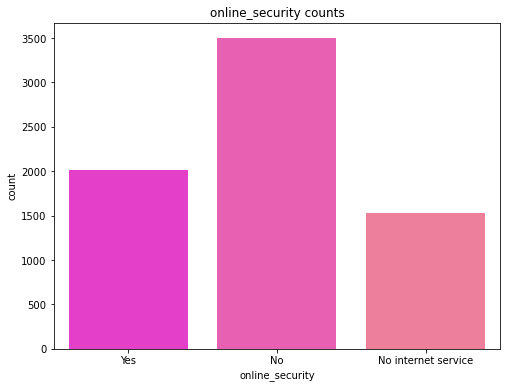

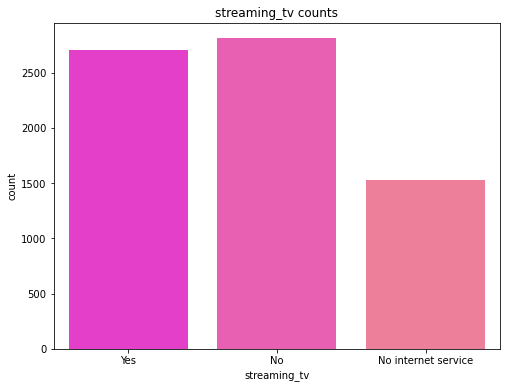

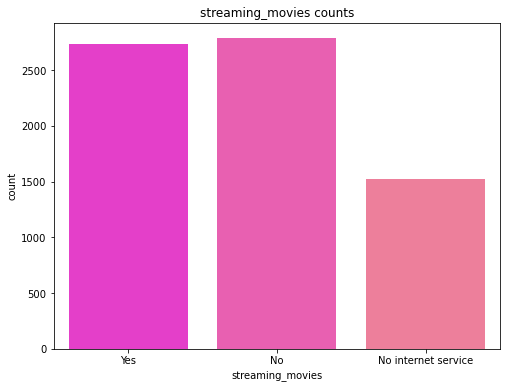

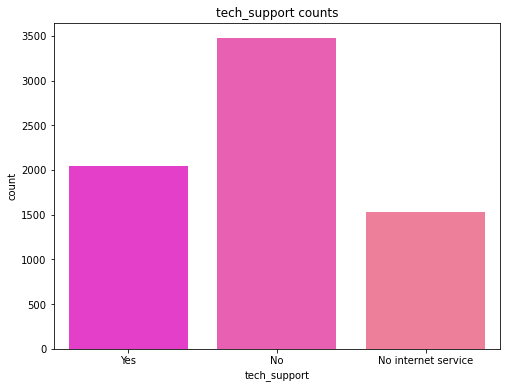

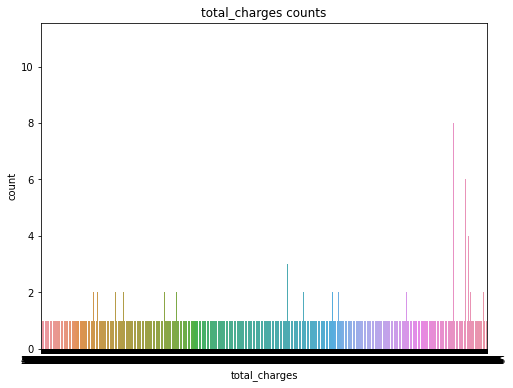

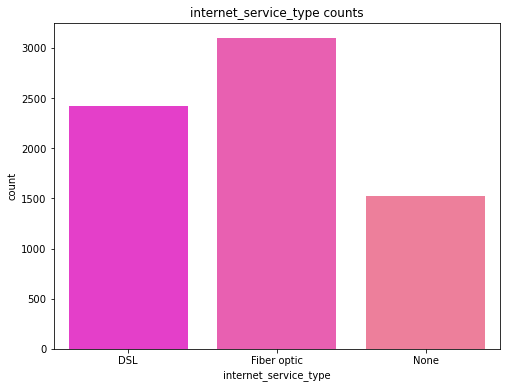

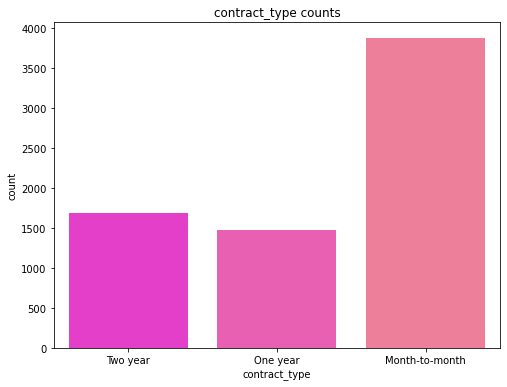

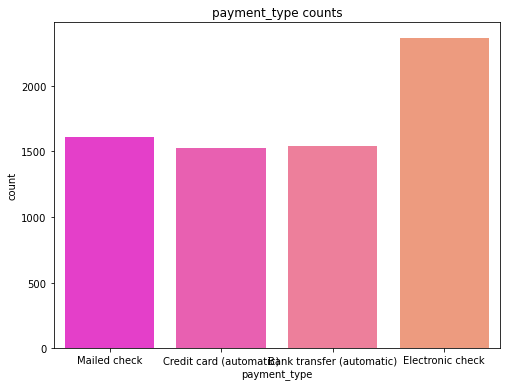

In [32]:
plot_counts(telco)

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(telco.tenure, palette=('spring'))
plt.title('Count of Customer Payment Types')
plt.xlabel('Tenure (months)')
plt.show()

# Step two: Prepare

Checklist for Prepare:
Create Prepare.py to store functions that are needed to prepare your data; make sure your module contains the necessary imports to run your code. Your final function should do the following:
   - [X] Handle Missing Values
   - [x] Handle erroneous data and/or outliers you wish to address.
   - [x] Encode variables as needed.
   - [x] Create any new features: add automatic_payment column
   - [x] Drop columns before and after explore: gender, customer_id, 
   - [x] Split your data into train/validate/test.
   - [x] Create encoded df for splitting and non-encoded df for exploring

In [33]:
# adds column for automatic payment, If their their payment type contains automatic, it's a 1
telco['autopay'] = (((telco['payment_type'] == "Credit card (automatic)") == True) | ((telco['payment_type'] == "Bank transfer (automatic)") == True)).astype(object)
telco.head()
telco.dtypes

customer_id                  object
churn                        object
dependents                   object
device_protection            object
gender                       object
monthly_charges             float64
multiple_lines               object
paperless_billing            object
partner                      object
phone_service                object
tenure                        int64
online_backup                object
online_security              object
senior_citizen                int64
streaming_tv                 object
streaming_movies             object
tech_support                 object
total_charges                object
internet_service_type_id      int64
internet_service_type        object
contract_type_id              int64
contract_type                object
payment_type_id               int64
payment_type                 object
autopay                      object
dtype: object

In [ ]:
telco.autopay.value_counts()

In [ ]:
telco.hist(figsize=(12,15))

In [ ]:
ax = telco.hist(column='tenure', by='gender', grid=False, figsize=(8,10), layout=(3,1), sharex=True, zorder=2, rwidth=0.9)

for i,x in enumerate(ax):

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, zorder=1)

    # Set x-axis label
    x.set_xlabel("Tenure by Gender", labelpad=20, weight='bold', size=12)
    
      # Set y-axis label
    if i == 1:
        x.set_ylabel("gender", labelpad=50, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    x.tick_params(axis='x', rotation=0)

In [ ]:
telco.columns

In [119]:
def split_data(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames; stratify on churn.
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.churn)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.churn)
    return train, validate, test

In [122]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [40]:
def prep_telco_explore(df):
    """
    This functions takes in the telco churn dataframe and retuns the cleaned and prepped dataset
    to use when doing exploratory data analysis
    """
    # list of columns to be dropped
    columns_to_drop = ['customer_id']
    
    # drops columns listed above
    df = df.drop(columns=columns_to_drop)
    
    #add autopay column
    df['autopay'] = (((df['payment_type'] == "Credit card (automatic)") == True) | ((df['payment_type'] == "Bank transfer (automatic)") == True)).astype(int)
    
    # Replace rows with no value in the total_charges column
    df.total_charges = pd.to_numeric(df.total_charges, errors='coerce').astype('float64')
    df.total_charges = df.total_charges.fillna(value="0")
    
    train, validate, test = split_data(df)

    return train, validate, test

In [35]:
def encode(df):
    '''
    Takes a dataframe and returns a new dataframe with encoded categorical variables
    '''
    label_encoder = LabelEncoder()
    for x in df.columns:
        df[x] = label_encoder.fit_transform(df[x])
    return df

In [123]:
def prep_telco_model(df):
    '''
    This function takes in a dataframe and returns the cleaned, encoded and split data.
    Adds autopay column and encodes categoricals.
    Use this function before modeling.
    returns train, validate, test
    '''
    
    # Replace rows with no value in the total_charges column
    df.total_charges = pd.to_numeric(df.total_charges, errors='coerce').astype('float64')
    df.total_charges = df.total_charges.fillna(value="0")
    
    #add numeric values to categoricals
    df["partner"] = df.partner == "Yes"
    df['partner'] = (df['partner']).astype(int)

    df["dependents"] = df.dependents == "Yes"
    df['dependents'] = (df['dependents']).astype(int)

    df["phone_service"] = df.phone_service == "Yes"
    df['phone_service'] = (df['phone_service']).astype(int)

    df["streaming_tv"] = df.streaming_tv == "Yes"
    df['streaming_tv'] = (df['streaming_tv']).astype(int)

    df["streaming_movies"] = df.streaming_movies == "Yes"
    df['streaming_movies'] = (df['streaming_movies']).astype(int)

    df["paperless_billing"] = df.paperless_billing == "Yes"
    df['paperless_billing'] = (df['paperless_billing']).astype(int)

    df["churn"] = df.churn == "Yes"
    df['churn'] = (df['churn']).astype(int)

    df["multiple_lines"] = df.multiple_lines == "Yes"
    df['multiple_lines'] = (df['multiple_lines']).astype(int)

    df["online_security"] = df.online_security == "Yes"
    df['online_security'] = (df['online_security']).astype(int)

    df["online_backup"] = df.online_backup == "Yes"
    df['online_backup'] = (df['online_backup']).astype(int)

    df["device_protection"] = df.device_protection == "Yes"
    df['device_protection'] = (df['device_protection']).astype(int)

    df["tech_support"] = df.tech_support == "Yes"
    df['tech_support'] = (df['tech_support']).astype(int)
    
    #drop redundant columns
    df = df.drop(columns =['payment_type_id', 'contract_type_id', 'internet_service_type_id', 'gender', 'customer_id', 'total_charges'])
    
    #make a dummy df, and combining it back to the original df. Dropping redundant columns again.
    dummy_df = pd.get_dummies(df[['internet_service_type', 'contract_type', 'payment_type']], drop_first=False)
    #rename columns
    dummy_df = dummy_df.rename(columns={'internet_service_type_DSL': 'dsl',
                                   'internet_service_type_Fiber optic': 'fiber_optic',
                                   'internet_service_type_None': 'no_internet',
                                   'contract_type_Month-to-month': 'monthly_contract',
                                   'contract_type_One year': 'one_year',
                                   'contract_type_Two year': 'two_year',
                                   'payment_type_Bank transfer (automatic)': 'auto_bank_transfer',
                                   'payment_type_Credit card (automatic)': 'auto_credit_card',
                                   'payment_type_Electronic check': 'electronic_check',
                                   'payment_type_Mailed check': 'mailed_check'})
    df = pd.concat([df, dummy_df], axis =1)
    
    
    #add autopay column
    df['autopay'] = (((df['payment_type'] == "Credit card (automatic)") == True) | ((df['payment_type'] == "Bank transfer (automatic)") == True)).astype(int)
    
    #drop payment_type column
    df = df.drop(columns=['payment_type', 'internet_service_type', 'contract_type'])
    
    # split into train validate and test 
    train, validate, test = train_validate_test_split(df, target='churn', seed=123)

    return train, validate, test

# Explore

In [294]:
#pull in data cleaned and prepped for explore
train, validate, test = prep_telco_explore(telco)

### Explore Univariate features

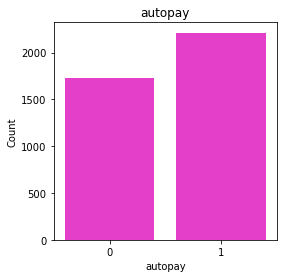

   autopay  Count  Percent
0        1   2212     56.1
1        0   1731     43.9
_________________________________________________________________


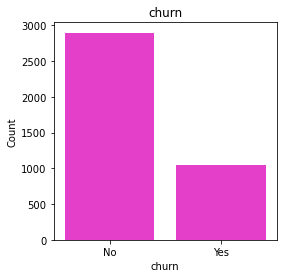

    churn  Count  Percent
No     No   2897    73.47
Yes   Yes   1046    26.53
_________________________________________________________________


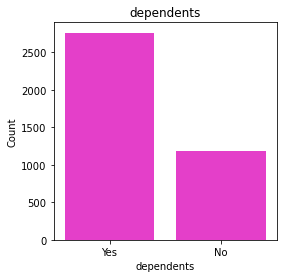

    dependents  Count  Percent
No         Yes   2764     70.1
Yes         No   1179     29.9
_________________________________________________________________


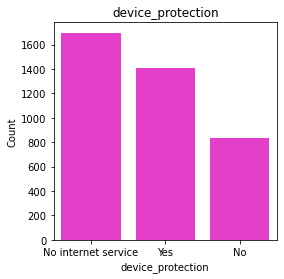

                       device_protection  Count  Percent
No                   No internet service   1696    43.01
Yes                                  Yes   1409    35.73
No internet service                   No    838    21.25
_________________________________________________________________


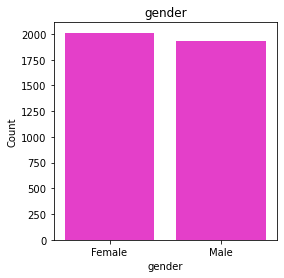

        gender  Count  Percent
Male    Female   2013    51.05
Female    Male   1930    48.95
_________________________________________________________________


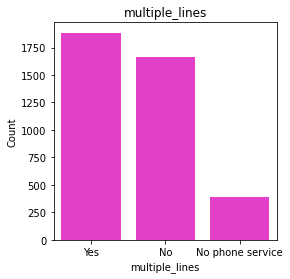

                    multiple_lines  Count  Percent
No                             Yes   1884    47.78
Yes                             No   1666    42.25
No phone service  No phone service    393     9.97
_________________________________________________________________


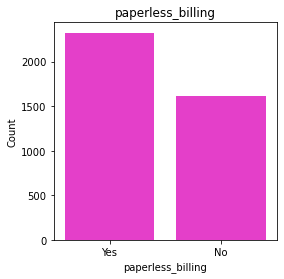

    paperless_billing  Count  Percent
Yes               Yes   2324    58.94
No                 No   1619    41.06
_________________________________________________________________


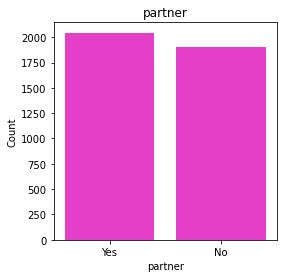

    partner  Count  Percent
No      Yes   2044    51.84
Yes      No   1899    48.16
_________________________________________________________________


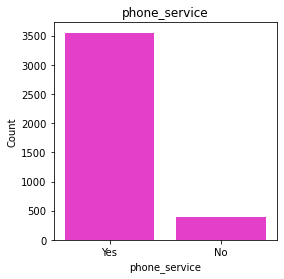

    phone_service  Count  Percent
Yes           Yes   3550    90.03
No             No    393     9.97
_________________________________________________________________


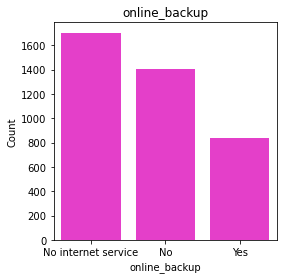

                           online_backup  Count  Percent
No                   No internet service   1703    43.19
Yes                                   No   1402    35.56
No internet service                  Yes    838    21.25
_________________________________________________________________


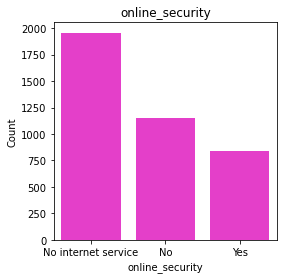

                         online_security  Count  Percent
No                   No internet service   1956    49.61
Yes                                   No   1149    29.14
No internet service                  Yes    838    21.25
_________________________________________________________________


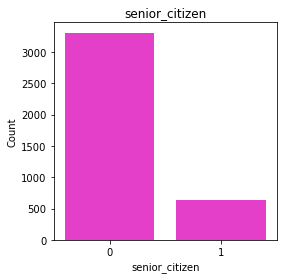

   senior_citizen  Count  Percent
0               0   3303    83.77
1               1    640    16.23
_________________________________________________________________


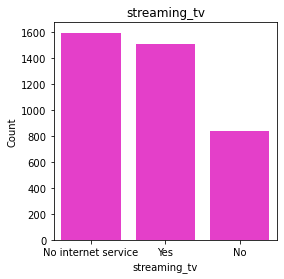

                            streaming_tv  Count  Percent
No                   No internet service   1597    40.50
Yes                                  Yes   1508    38.24
No internet service                   No    838    21.25
_________________________________________________________________


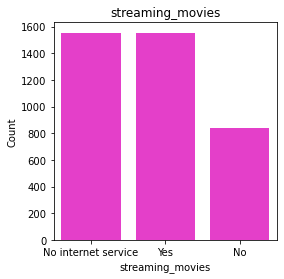

                        streaming_movies  Count  Percent
Yes                  No internet service   1554    39.41
No                                   Yes   1551    39.34
No internet service                   No    838    21.25
_________________________________________________________________


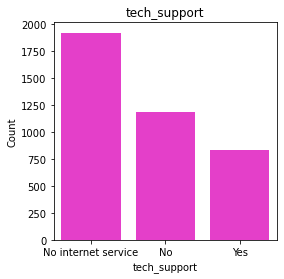

                            tech_support  Count  Percent
No                   No internet service   1921    48.72
Yes                                   No   1184    30.03
No internet service                  Yes    838    21.25
_________________________________________________________________


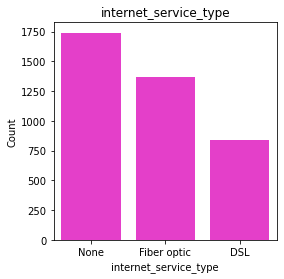

            internet_service_type  Count  Percent
Fiber optic                  None   1740    44.13
DSL                   Fiber optic   1365    34.62
None                          DSL    838    21.25
_________________________________________________________________


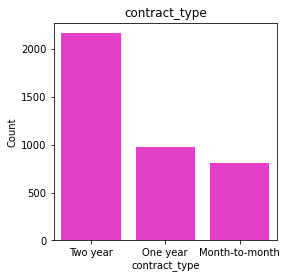

                 contract_type  Count  Percent
Month-to-month        Two year   2162    54.83
Two year              One year    974    24.70
One year        Month-to-month    807    20.47
_________________________________________________________________


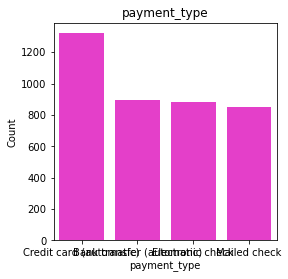

                                        payment_type  Count  Percent
Electronic check             Credit card (automatic)   1320    33.48
Mailed check               Bank transfer (automatic)    892    22.62
Bank transfer (automatic)           Electronic check    879    22.29
Credit card (automatic)                 Mailed check    852    21.61
_________________________________________________________________


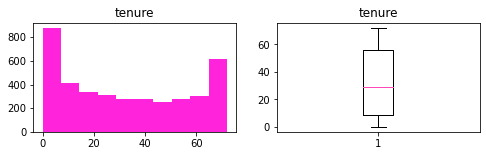

count    3943.000000
mean       32.673852
std        24.472862
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64


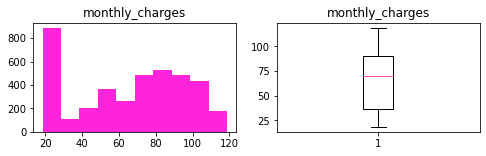

count    3943.000000
mean       65.102790
std        30.128631
min        18.550000
25%        36.200000
50%        70.400000
75%        90.050000
max       118.650000
Name: monthly_charges, dtype: float64


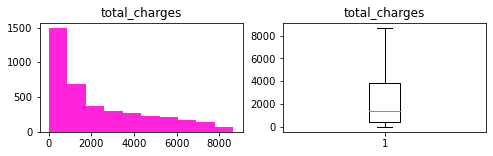

count    3943.000000
mean     2310.594370
std      2275.807592
min         0.000000
25%       416.175000
50%      1415.000000
75%      3816.625000
max      8670.100000
Name: total_charges, dtype: float64


In [295]:
explore.explore_univariate(train, cat_vars, quant_vars)

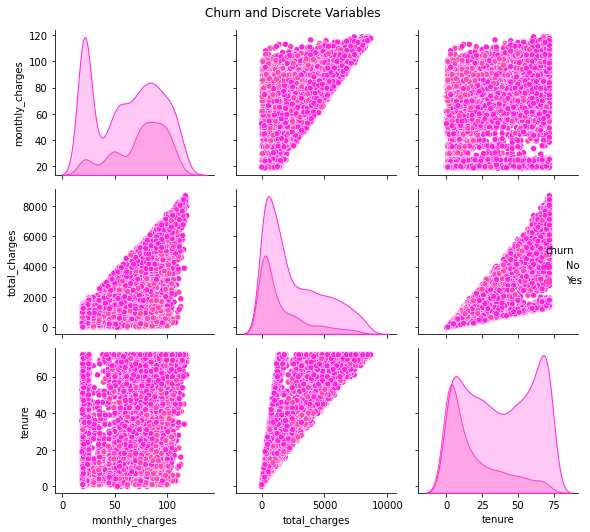

In [297]:
# Explore continuous variables
sns.pairplot(train, vars = ['monthly_charges','total_charges','tenure'], hue = 'churn')
plt.suptitle('Churn and Discrete Variables')
plt.tight_layout()
plt.show()

In [46]:
def subplot(df):
    '''returns countplots and displots of all columns in dataframe in relation to churn'''
    for col in df.columns:
        if df[col].dtype == 'object':
            sns.countplot(data=train, hue=(df[col]) , x = 'churn', palette=('spring_r')) 
            plt.title(f'{col} and Churn')
            plt.show()
        sns.displot(train, x=(df[col]), hue = 'churn', multiple= 'stack', palette=('spring_r'))
        plt.title(f'{col} and Churn')
        plt.show()

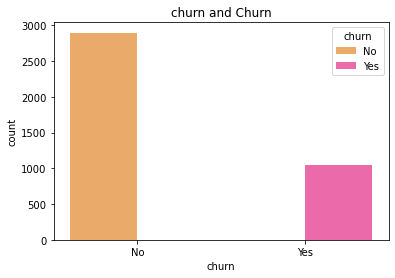

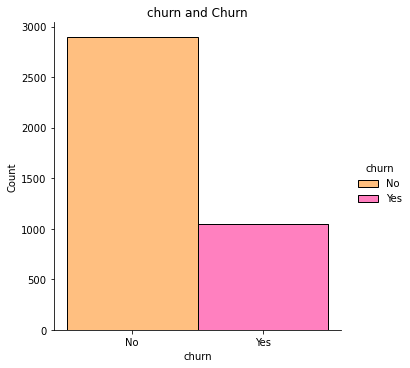

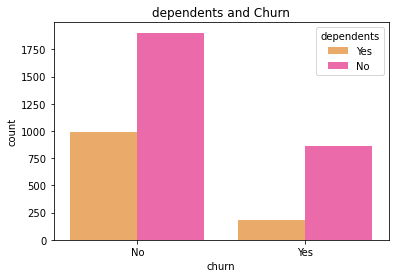

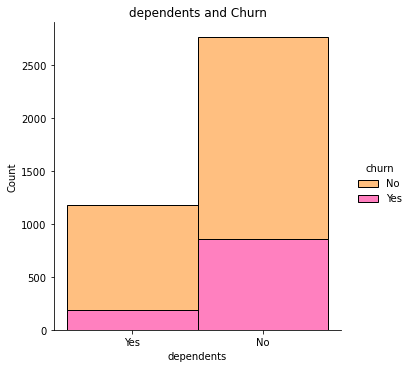

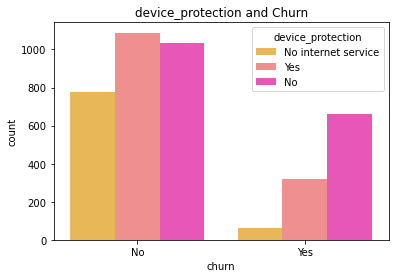

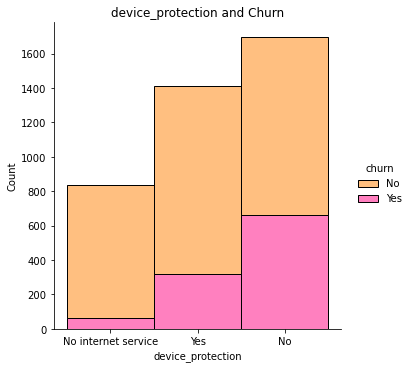

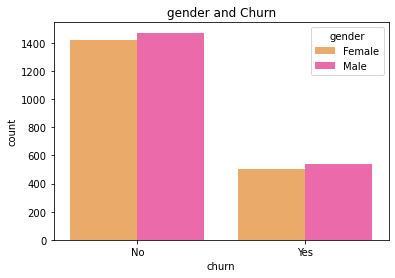

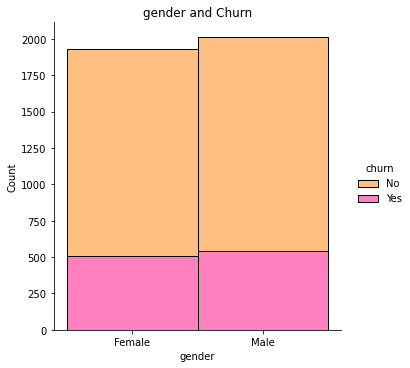

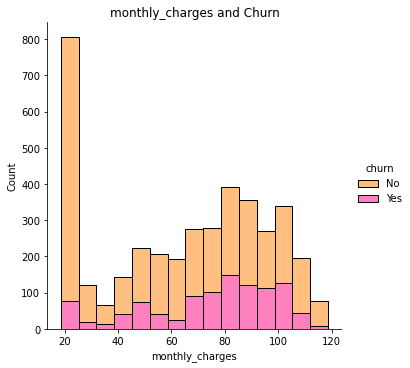

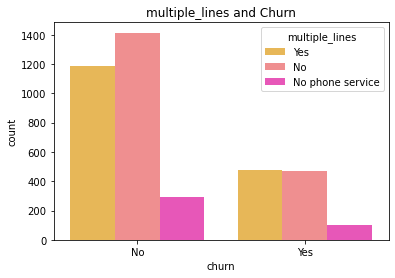

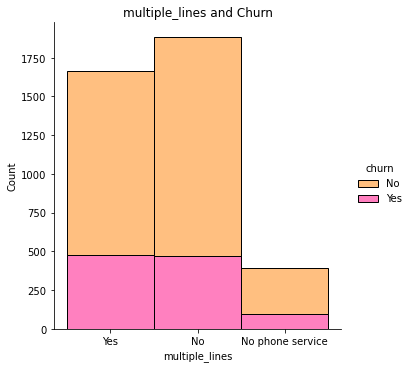

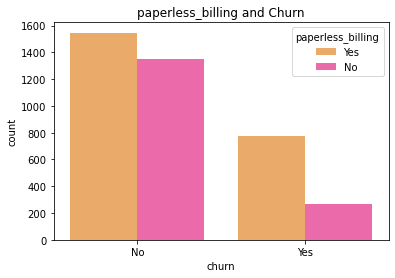

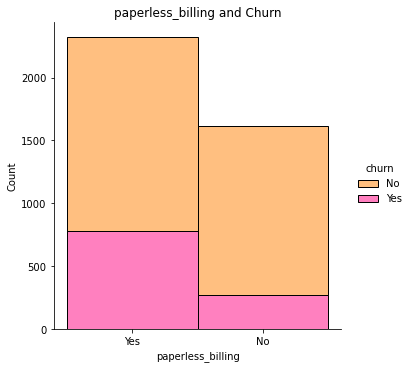

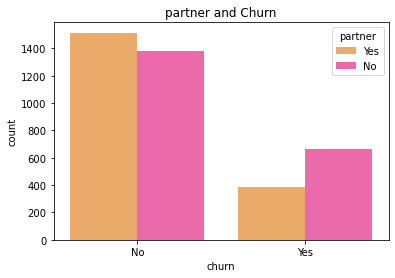

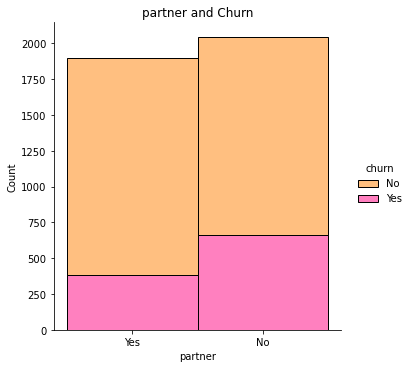

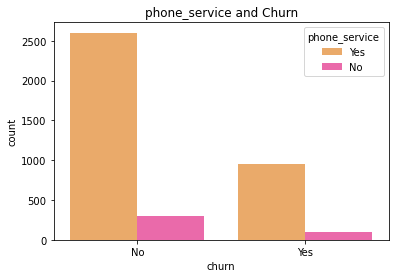

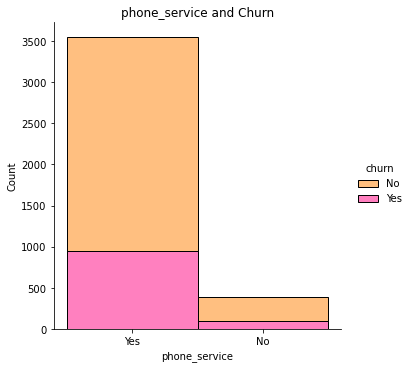

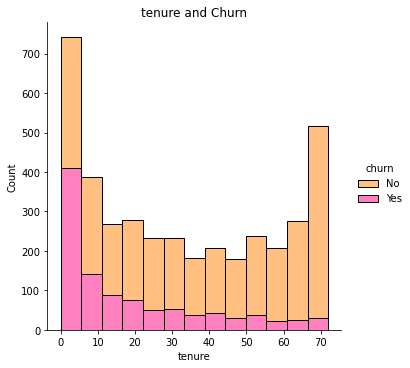

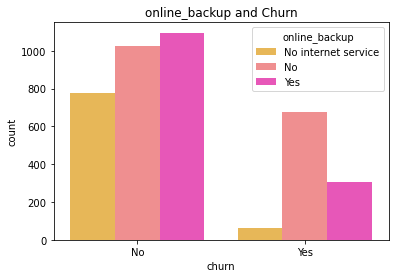

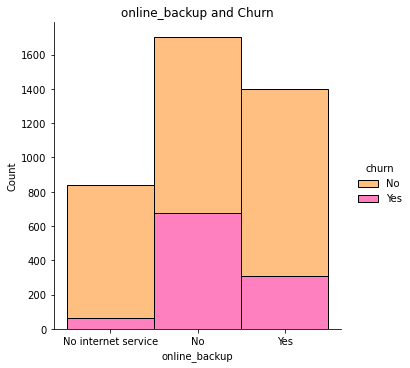

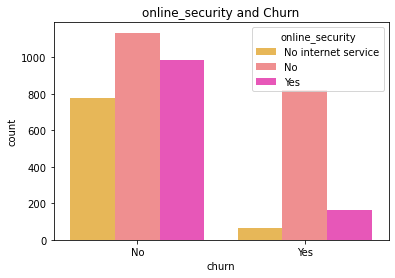

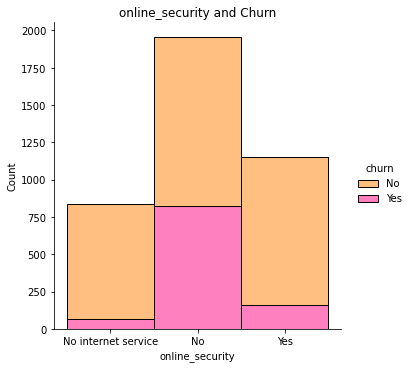

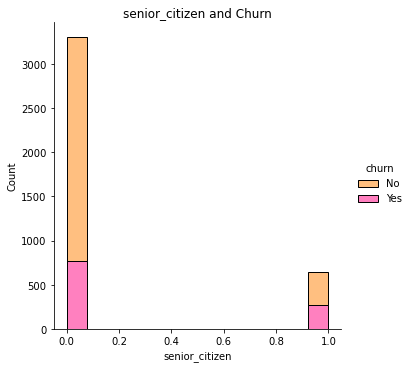

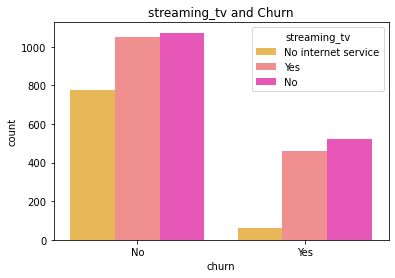

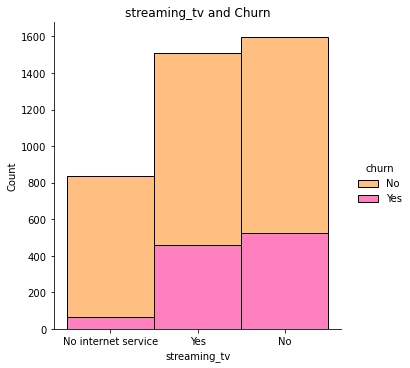

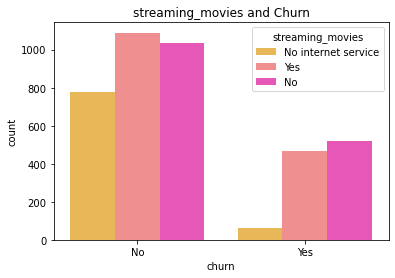

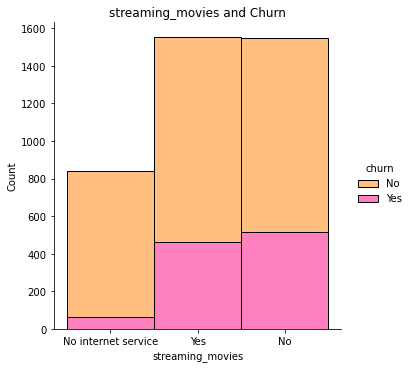

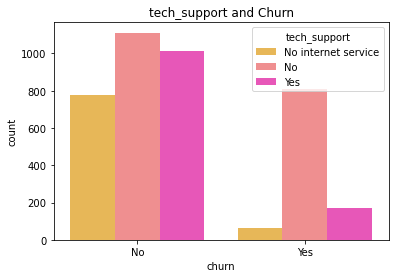

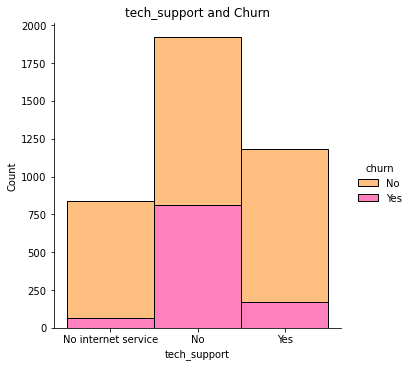

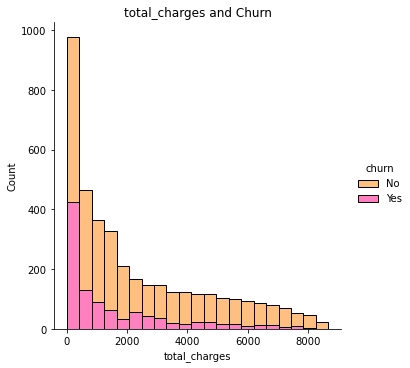

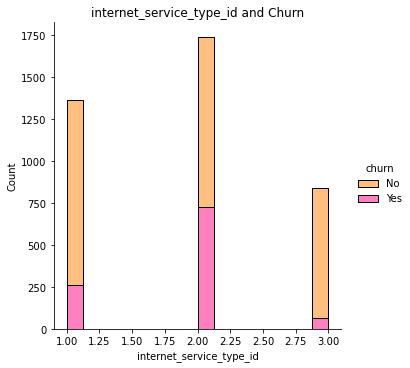

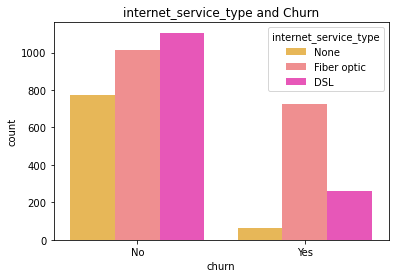

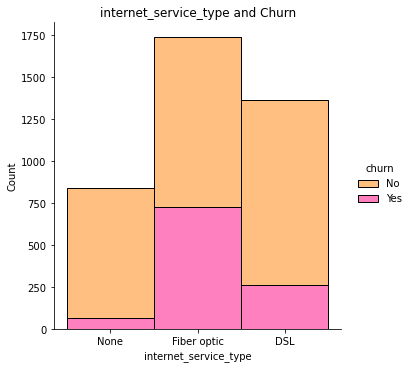

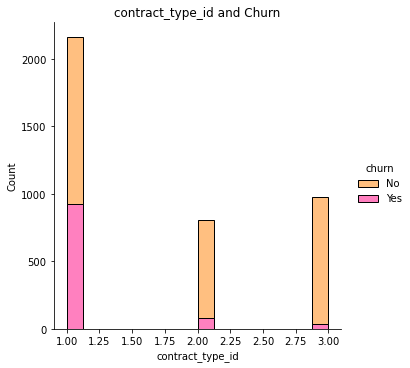

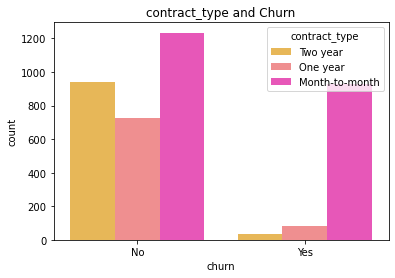

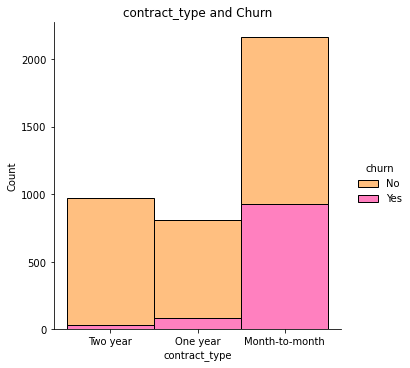

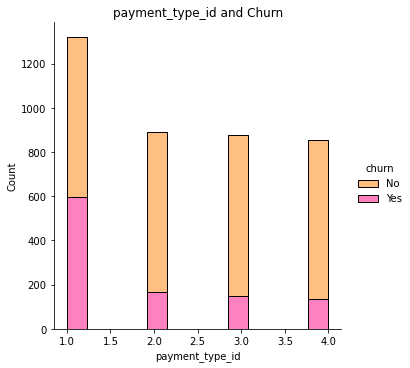

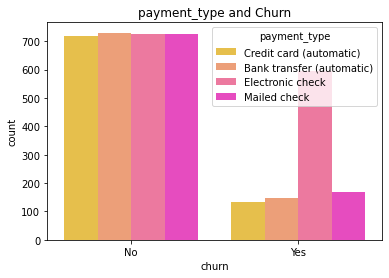

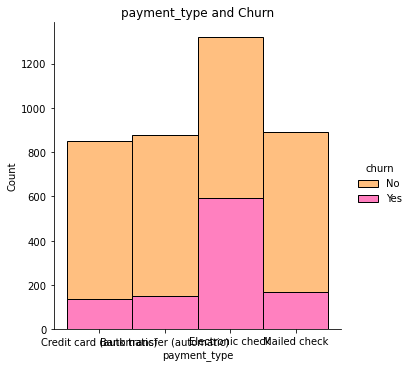

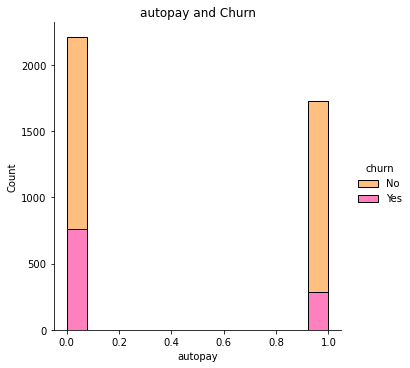

In [47]:
subplot(train)

In [ ]:
sns.countplot(data=train, hue='gender' , x = 'churn', palette=('spring_r')) 
plt.title('Gender and Churn')
plt.show()


sns.displot(train, x='gender', hue = 'churn', multiple= 'stack', palette=('spring_r'))
plt.title('Gender and Churn')
plt.show()

In [ ]:
subplot(train)

In [ ]:
plt.subplots()
sns.countplot(data=train, hue='autopay' , x = 'churn', palette=('spring_r')) 
plt.title('Autopay and Churn')
plt.show()


sns.displot(train, x='autopay', hue = 'churn', multiple= 'stack', palette=('spring_r'))
plt.title('Autopay and Churn')
plt.show()

In [ ]:
plt.subplots()
sns.countplot(data=train, hue='gender' , x = 'churn', palette=('spring_r')) 
plt.title('Gender and Churn')
plt.show()


sns.displot(train, x='gender', hue = 'churn', multiple= 'stack', palette=('spring_r'))
plt.title('Gender and Churn')
plt.show()

In [ ]:
plt.subplots()
sns.countplot(data=train, hue='senior_citizen' , x = 'churn', palette=('spring_r')) 
plt.title('Senior Citizen and Churn')
plt.show()


sns.displot(train, x='senior_citizen', hue = 'churn', multiple= 'stack', palette=('spring_r'))
plt.title('Senior Citizen and Churn')
plt.show()

In [ ]:
train.columns

### Takeaways:
- The rate of churn for customers on autopay is lower than those not on autopay.
- There does not appear to be any correlation between gender and churn
- Month to Month customers have a significantly higher rate of churn
- There seems to be a higher rate of churn for senior citizens, but they are a small portion of the customer base
- electronic check customers have a high rate of churn
- For internet types, Fiber optics has a high rate of churn
- Customers without tech support have a higher rate of churn
- drop gender as there is very little value/correlation to churn - run stat test to verify

## Statistical Testing

### Autopay and Churn Chi Squared Test

In [50]:
alpha = .5
observed = pd.crosstab(train['autopay'], train['churn'])
observed

churn,No,Yes
autopay,,
0,1450,762
1,1447,284


In [51]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [52]:
print('Observed:\n')
print(observed)
print('~~~~~~~~~~~~~~~~~~~~~~')
print('Expected: \n')
print(pd.DataFrame(expected, index=observed.index, columns=observed.columns))
print('~~~~~~~~~~~~~~~~~~~~~~')
print(f'chi^2 value: {chi2:.4f}')
print(f'p value: {p:.8f}')
print(f'degrees of freedom: {degf}')
if p < alpha:
    print('''Our p value is less than our alpha and we can reject the null hypothesis
         We can suggest that autopay is not independent of churn''')
else:
    print('We cannot reject the null hypothesis')

Observed:

churn      No  Yes
autopay           
0        1450  762
1        1447  284
~~~~~~~~~~~~~~~~~~~~~~
Expected: 

churn             No         Yes
autopay                         
0        1625.200101  586.799899
1        1271.799899  459.200101
~~~~~~~~~~~~~~~~~~~~~~
chi^2 value: 161.2517
p value: 0.00000000
degrees of freedom: 1
Our p value is less than our alpha and we can reject the null hypothesis
         We can suggest that autopay is not independent of churn


### Gender and Churn - defend dropping column

In [53]:
alpha = .5
gender_observed = pd.crosstab(train['gender'], train['churn'])
gender_observed

churn,No,Yes
gender,,
Female,1424,506
Male,1473,540


In [54]:
chi2, p, degf, expected = stats.chi2_contingency(gender_observed)

In [55]:
print('Observed:\n')
print(observed)
print('~~~~~~~~~~~~~~~~~~~~~~')
print('Expected: \n')
print(pd.DataFrame(expected, index=observed.index, columns=observed.columns))
print('~~~~~~~~~~~~~~~~~~~~~~')
print(f'chi^2 value: {chi2:.4f}')
print(f'p value: {p:.8f}')
print(f'degrees of freedom: {degf}')
if p < alpha:
    print('''Our p value is less than our alpha and we can reject the null hypothesis
         We can suggest that gender is not independent of churn''')
else:
    print('We cannot reject the null hypothesis')

Observed:

churn      No  Yes
autopay           
0        1450  762
1        1447  284
~~~~~~~~~~~~~~~~~~~~~~
Expected: 

churn            No        Yes
autopay                       
0        1418.00913  511.99087
1        1478.99087  534.00913
~~~~~~~~~~~~~~~~~~~~~~
chi^2 value: 0.1570
p value: 0.69193985
degrees of freedom: 1
We cannot reject the null hypothesis


### Takeaways:
 - Autopay is NOT independent of churn
 - Gender is independent of churn

# Model

In [298]:
# Import data again with function that encodes
train, validate, test = prep_telco_model(acquire.new_telco_data())
train.head()

,churn,dependents,device_protection,monthly_charges,multiple_lines,paperless_billing,partner,phone_service,tenure,online_backup,...,fiber_optic,no_internet,monthly_contract,one_year,two_year,auto_bank_transfer,auto_credit_card,electronic_check,mailed_check,autopay
5642,0,1,0,25.60,1,1,1,1,23,0,...,0,1,0,0,1,0,1,0,0,1
3338,0,0,1,100.50,1,1,0,1,27,0,...,1,0,0,1,0,1,0,0,0,1
4273,0,0,0,89.15,0,1,0,1,7,0,...,1,0,1,0,0,0,0,1,0,0
2382,0,0,0,58.60,0,1,1,1,47,1,...,0,0,1,0,0,1,0,0,0,1
2655,0,0,0,99.65,0,1,0,1,41,1,...,1,0,0,0,1,0,1,0,0,1


In [299]:
train.columns

Index(['churn', 'dependents', 'device_protection', 'monthly_charges',
       'multiple_lines', 'paperless_billing', 'partner', 'phone_service',
       'tenure', 'online_backup', 'online_security', 'senior_citizen',
       'streaming_tv', 'streaming_movies', 'tech_support', 'dsl',
       'fiber_optic', 'no_internet', 'monthly_contract', 'one_year',
       'two_year', 'auto_bank_transfer', 'auto_credit_card',
       'electronic_check', 'mailed_check', 'autopay'],
      dtype='object')

In [300]:
validate.head()

,churn,dependents,device_protection,monthly_charges,multiple_lines,paperless_billing,partner,phone_service,tenure,online_backup,...,fiber_optic,no_internet,monthly_contract,one_year,two_year,auto_bank_transfer,auto_credit_card,electronic_check,mailed_check,autopay
1630,1,0,0,53.85,0,1,0,1,2,1,...,0,0,1,0,0,0,0,0,1,0
5181,1,1,0,71.65,0,1,0,1,1,0,...,1,0,1,0,0,0,0,1,0,0
4239,0,0,0,75.40,0,1,0,1,23,0,...,1,0,1,0,0,1,0,0,0,1
5814,0,1,0,24.45,1,0,1,1,45,0,...,0,1,0,0,1,0,0,0,1,0
1438,1,0,1,67.95,1,0,1,1,5,0,...,0,0,1,0,0,1,0,0,0,1


In [301]:
#check that all data types are model ready.
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 5642 to 6840
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   churn               3943 non-null   int64  
 1   dependents          3943 non-null   int64  
 2   device_protection   3943 non-null   int64  
 3   monthly_charges     3943 non-null   float64
 4   multiple_lines      3943 non-null   int64  
 5   paperless_billing   3943 non-null   int64  
 6   partner             3943 non-null   int64  
 7   phone_service       3943 non-null   int64  
 8   tenure              3943 non-null   int64  
 9   online_backup       3943 non-null   int64  
 10  online_security     3943 non-null   int64  
 11  senior_citizen      3943 non-null   int64  
 12  streaming_tv        3943 non-null   int64  
 13  streaming_movies    3943 non-null   int64  
 14  tech_support        3943 non-null   int64  
 15  dsl                 3943 non-null   uint8  
 16  fib

### Establish the baseline
 - Take most common value, not churned and add baseline column

In [302]:
# inputs baseline values and then calculates the accuracy compared to the actual churn rates
train['baseline'] = 0
baseline_accuracy = (train.baseline == train.churn).mean()
print(f'Baseline accuracy is {baseline_accuracy:.2%}')

Baseline accuracy is 73.47%


### Predictions Explained Four Ways:
- True Positive: True Positive. We predicted the customer would stay & they did.
- True Negative: True Negative. We predicted the customer would leave & they did.
- False Positive: False Positive. We predicted the customer would stay & they didn't.
- False Negative: False Negative. We predicted the customer would leave & they didn't.

#### The focus for the models is to optimize recall to maximize the amount of positive cases predict.  A positive case is a customer staying.  By predicting which customers will stay we can focus efforts on those that are predicted to leave.

In [303]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['churn'])
y_train = train.churn

X_validate = validate.drop(columns=['churn'])
y_validate = validate.churn

X_test = test.drop(columns=['churn'])
y_test = test.churn

## Random Forest

In [304]:
#Create the object
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=5,
                            n_estimators=100,
                            max_depth=15, 
                            random_state=123)

In [305]:
###### fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=5, random_state=123)

In [306]:
# Evaluate feature importance
print(rf.feature_importances_)

[0.01073396 0.01087201 0.13826254 0.01805603 0.0274956  0.01427018
 0.0076344  0.23710923 0.01706128 0.02935699 0.01844755 0.01513844
 0.01648402 0.02982491 0.01422423 0.07150986 0.0279581  0.14799566
 0.0165744  0.04253289 0.00866033 0.01092742 0.04426982 0.00743607
 0.01716408 0.        ]


In [307]:
#make predictions
y_pred = rf.predict(X_train)

In [308]:
# estimate probability
y_pred_proba = rf.predict_proba(X_train)

### Evaluate the Model

#### Compute Accuracy

In [309]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.85


#### Create a confusion matrix

In [310]:
print(confusion_matrix(y_train, y_pred))

[[2725  172]
 [ 404  642]]


#### Print Classification Report

In [311]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2897
           1       0.79      0.61      0.69      1046

    accuracy                           0.85      3943
   macro avg       0.83      0.78      0.80      3943
weighted avg       0.85      0.85      0.85      3943



In [312]:
def model_metrics(X, y, model, data_set = 'data_set'):
    """
    
    Takes in X , target as y, the model for testing, and the data_set(i.e. train, validate, test)\n
    Outputs a print list with the confusion matrix, classification report, confusion matrix, and the T/F +/- rate
   
   """
    score = model.score(X, y)
    matrix = confusion_matrix(y, model.predict(X))
    tpr = matrix[1,1] / (matrix[1,1] + matrix[1,0])
    fpr = matrix[0,1] / (matrix[0,1] + matrix[0,0])
    tnr = matrix[0,0] / (matrix[0,0] + matrix[0,1])
    fnr = matrix[1,0] / (matrix[1,1] + matrix[1,0])
    prc = matrix[1,1] / (matrix[1,1] + matrix[0,1])
    
    print(f'{data_set} accuracy score: {score:.2%}')
    print(f'{data_set} precision score {prc:.2%}')
    print(f'{data_set} recall score: {tpr:.2%}\n')
    class_report = classification_report(y, model.predict(X), zero_division=True)
    print('-------------------------------')
    print(f'classification report')
    print(class_report)
    print ('-------------------------------\n')
    print('confusion matrix')
    print(f'{matrix}\n')
    print(f'{data_set} model metrics')
    print('---------------------------------')
    print(f'True positive rate for the model is {tpr:.2%}')
    print(f'False positive rate for the model is  {fpr:.2%}')
    print(f'True negative rate for the model is {tnr:.2%}')
    print(f'False negative rate for the model is {fnr:.2%}\n')

In [313]:
model_metrics(X_train, y_train, rf, data_set = 'train')

train accuracy score: 85.39%
train precision score 78.87%
train recall score: 61.38%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2897
           1       0.79      0.61      0.69      1046

    accuracy                           0.85      3943
   macro avg       0.83      0.78      0.80      3943
weighted avg       0.85      0.85      0.85      3943

-------------------------------

confusion matrix
[[2725  172]
 [ 404  642]]

train model metrics
---------------------------------
True positive rate for the model is 61.38%
False positive rate for the model is  5.94%
True negative rate for the model is 94.06%
False negative rate for the model is 38.62%



In [314]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

ValueError: X has 25 features, but DecisionTreeClassifier is expecting 26 features as input.

In [315]:
model_metrics(X_validate, y_validate, rf, data_set = 'validate')

ValueError: X has 25 features, but DecisionTreeClassifier is expecting 26 features as input.

In [248]:
# Evaluate other model features
for i in range(2, 11):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = forest.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 2
                     0            1  accuracy    macro avg  weighted avg
precision     0.765495     0.796296  0.767182     0.780896      0.773666
recall        0.984812     0.164436  0.767182     0.574624      0.767182
f1-score      0.861413     0.272583  0.767182     0.566998      0.705208
support    2897.000000  1046.000000  0.767182  3943.000000   3943.000000

Tree with max depth of 3
                     0            1  accuracy    macro avg  weighted avg
precision     0.798157     0.734043  0.790515     0.766100      0.781149
recall        0.956852     0.329828  0.790515     0.643340      0.790515
f1-score      0.870330     0.455145  0.790515     0.662737      0.760189
support    2897.000000  1046.000000  0.790515  3943.000000   3943.000000

Tree with max depth of 4
                     0            1  accuracy    macro avg  weighted avg
precision     0.814183     0.707155   0.79787     0.760669      0.785791
recall        0.939247     0.406310   0.79787  

In [249]:
# compare in-sample to out-of-sample
metrics = []

for i in range(2, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.760588,0.769367,-0.008779
1,3,0.792037,0.793613,-0.001577
2,4,0.795080,0.781786,0.013294
3,5,0.799138,0.794796,0.004342
4,6,0.814101,0.781786,0.032315
5,7,0.825767,0.783560,0.042207
6,8,0.840730,0.772915,0.067815
7,9,0.862288,0.750444,0.111844
8,10,0.882069,0.741573,0.140496
9,11,0.900330,0.749261,0.151069


In [277]:
# Let's compare in-sample to out-of-sample
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = max_depth - i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,18,0.922141,0.791839,0.130301
1,3,17,0.882577,0.797161,0.085415
2,4,16,0.867613,0.801301,0.066312
3,5,15,0.855440,0.803075,0.052365
4,6,14,0.846817,0.800118,0.046699
5,7,13,0.841491,0.799527,0.041964
6,8,12,0.837687,0.799527,0.038160
7,9,11,0.832615,0.801301,0.031314
8,10,10,0.831093,0.803666,0.027427
9,11,9,0.825006,0.803666,0.021340


### Takeaways:
- model beat baseline - yay!
- model was great at predicting churn
- with more time I would love to do more with the features
- This model has been selected.  It 


### Decision Tree

In [251]:
# Make the model
tree1 = DecisionTreeClassifier(max_depth=1, random_state=123)

# Fit the model
tree1 = tree1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree1.predict(X_train)

# Print classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of 1 depth")
pd.DataFrame(report)

Tree of 1 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.734720,0.0,0.73472,0.367360,0.539813
recall,1.000000,0.0,0.73472,0.500000,0.734720
f1-score,0.847076,0.0,0.73472,0.423538,0.622363
support,2897.000000,1046.0,0.73472,3943.000000,3943.000000


In [252]:
# Take a look at other parameters:
for i in range(2, 11):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 2
                     0            1  accuracy    macro avg  weighted avg
precision     0.856517     0.542359  0.760588     0.699438      0.773177
recall        0.809803     0.624283  0.760588     0.717043      0.760588
f1-score      0.832505     0.580444  0.760588     0.706475      0.765639
support    2897.000000  1046.000000  0.760588  3943.000000   3943.000000

Tree with max depth of 3
                     0            1  accuracy    macro avg  weighted avg
precision     0.805711     0.706960  0.792037     0.756335      0.779514
recall        0.944770     0.369025  0.792037     0.656898      0.792037
f1-score      0.869717     0.484925  0.792037     0.677321      0.767639
support    2897.000000  1046.000000  0.792037  3943.000000   3943.000000

Tree with max depth of 4
                     0            1  accuracy    macro avg  weighted avg
precision     0.829807     0.653351   0.79508     0.741579      0.782997
recall        0.907145     0.484704   0.79508  

In [253]:
# Let's compare in-sample to out-of-sample
metrics = []

for i in range(2, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.760588,0.769367,-0.008779
1,3,0.792037,0.793613,-0.001577
2,4,0.795080,0.781786,0.013294
3,5,0.799138,0.794796,0.004342
4,6,0.814101,0.781786,0.032315
5,7,0.825767,0.783560,0.042207
6,8,0.840730,0.772915,0.067815
7,9,0.862288,0.750444,0.111844
8,10,0.882069,0.741573,0.140496
9,11,0.900330,0.749261,0.151069


In [254]:
# Set a threshhold of difference
# Set our threshold for how overfit we'll tolerate
threshold = 0.10

models = []
metrics = []

for i in range(2, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)   
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    # Calculate the difference
    difference = in_sample_accuracy - out_of_sample_accuracy
    
    # Add a conditional to check vs. the threshold
    if difference > threshold:
        break
    
    # Formulate the output for each model's performance on train and validate
    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy,
        "difference": difference
    }
    
    # Add the metrics dictionary to the list, so we can make a dataframe
    metrics.append(output)
    
    # Add the specific tree to a list of trained models
    models.append(tree)
    
df = pd.DataFrame(metrics)
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.760588,0.769367,-0.008779
1,3,0.792037,0.793613,-0.001577
2,4,0.795080,0.781786,0.013294
3,5,0.799138,0.794796,0.004342
4,6,0.814101,0.781786,0.032315
5,7,0.825767,0.783560,0.042207
6,8,0.840730,0.772915,0.067815


In [255]:
#Tree 3 with max depth of 5 is the model I'd pick for the decision tree model
# Make the model
tree3 = DecisionTreeClassifier(max_depth=5, random_state=123)

# Fit the model
tree3 = tree3.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree3.predict(X_train)

# Print classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of 5 depth")
pd.DataFrame(report)

Tree of 5 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.845649,0.641425,0.799138,0.743537,0.791472
recall,0.888851,0.550669,0.799138,0.719760,0.799138
f1-score,0.866712,0.592593,0.799138,0.729652,0.793993
support,2897.000000,1046.000000,0.799138,3943.000000,3943.000000


In [256]:
#print metrics for train
model_metrics(X_train, y_train, tree3, data_set = 'train')

train accuracy score: 79.91%
train precision score 64.14%
train recall score: 55.07%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2897
           1       0.64      0.55      0.59      1046

    accuracy                           0.80      3943
   macro avg       0.74      0.72      0.73      3943
weighted avg       0.79      0.80      0.79      3943

-------------------------------

confusion matrix
[[2575  322]
 [ 470  576]]

train model metrics
---------------------------------
True positive rate for the model is 55.07%
False positive rate for the model is  11.11%
True negative rate for the model is 88.89%
False negative rate for the model is 44.93%



In [259]:
#print metrics for validate
model_metrics(X_validate, y_validate, tree3, data_set = 'validate')

validate accuracy score: 79.48%
validate precision score 63.42%
validate recall score: 53.67%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1242
           1       0.63      0.54      0.58       449

    accuracy                           0.79      1691
   macro avg       0.74      0.71      0.72      1691
weighted avg       0.79      0.79      0.79      1691

-------------------------------

confusion matrix
[[1103  139]
 [ 208  241]]

validate model metrics
---------------------------------
True positive rate for the model is 53.67%
False positive rate for the model is  11.19%
True negative rate for the model is 88.81%
False negative rate for the model is 46.33%



### Takeaways for Decision Tree Model
- The model beat baseline.. yay!
- This model also did well predicting churn, but didn't do as well predicting when a customer would stay
- With more time I would adjust more of the parameters to fine tune this model further


## KNN

In [270]:
#create object:
knn = KNeighborsClassifier(n_neighbors=12, weights='uniform')

In [271]:
#fit the model to training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [272]:
#make predictions
y_pred = knn.predict(X_train)

In [273]:
#estimate probability
y_pred_proba = knn.predict_proba(X_train)

### Evaluate the model

In [274]:
#view metrics
#print metrics for train
model_metrics(X_train, y_train, knn, data_set = 'train')

train accuracy score: 81.54%
train precision score 73.31%
train recall score: 47.80%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      2897
           1       0.73      0.48      0.58      1046

    accuracy                           0.82      3943
   macro avg       0.78      0.71      0.73      3943
weighted avg       0.81      0.82      0.80      3943

-------------------------------

confusion matrix
[[2715  182]
 [ 546  500]]

train model metrics
---------------------------------
True positive rate for the model is 47.80%
False positive rate for the model is  6.28%
True negative rate for the model is 93.72%
False negative rate for the model is 52.20%



In [275]:
#print metrics for validate
model_metrics(X_validate, y_validate, knn, data_set = 'validate')

validate accuracy score: 79.48%
validate precision score 67.59%
validate recall score: 43.65%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1242
           1       0.68      0.44      0.53       449

    accuracy                           0.79      1691
   macro avg       0.75      0.68      0.70      1691
weighted avg       0.78      0.79      0.78      1691

-------------------------------

confusion matrix
[[1148   94]
 [ 253  196]]

validate model metrics
---------------------------------
True positive rate for the model is 43.65%
False positive rate for the model is  7.57%
True negative rate for the model is 92.43%
False negative rate for the model is 56.35%



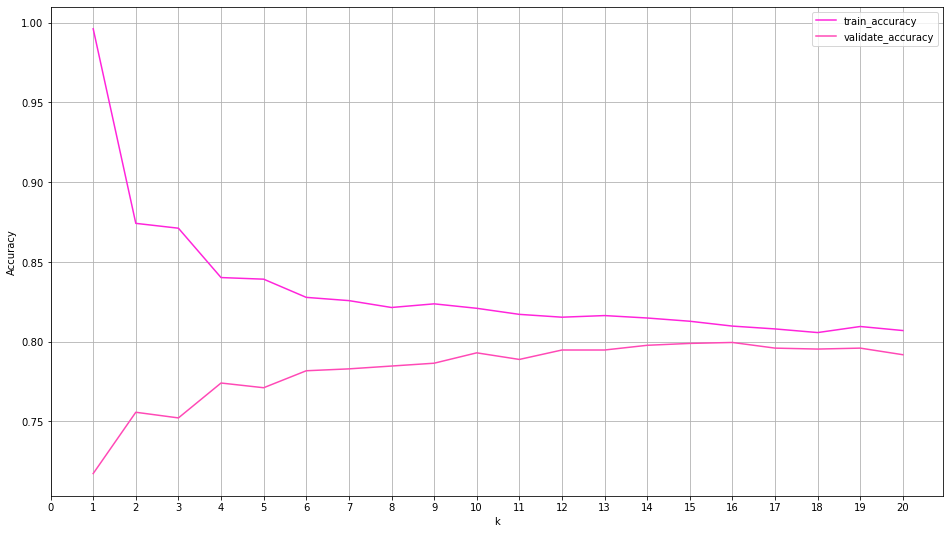

In [276]:
metrics = []

# loop through different values of k
for k in range(1, 21):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remmeber only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)

# plot the data
results.set_index('k').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

In [ ]:
### Takeaways:
- this model beat baseline accuracy.. yay!
- the accuracy on this model

### Test Model

### The Random Forest Model was selected as the best model because it had the most well rounded preformance metrics.
Let's see how it does on the test data!



In [293]:
#Fingers crossed!
model_metrics(X_test, y_test, rf, data_set = 'test')

test accuracy score: 80.84%
test precision score 66.77%
test recall score: 55.35%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.67      0.55      0.61       374

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

-------------------------------

confusion matrix
[[932 103]
 [167 207]]

test model metrics
---------------------------------
True positive rate for the model is 55.35%
False positive rate for the model is  9.95%
True negative rate for the model is 90.05%
False negative rate for the model is 44.65%



## Final Conclusions:
- The Random Forest Model preformed best and was the most well rounded model for the job
Accuracy on validate was 91.7%
Recall was 67%
Accuracy on Test 89.3% accuracy which was only slighly lower than our accuracy on validate set
Recall stayed pretty high (relatively so) as well 64.9%

## Recommendations:
 - Put the model into production and begin targeting the customers flagged to churn with targeted marketing.
    - From the data we can see a correlation between month to month customers and churn:
    - Send out offers to month to month customers offering a discounted contract rate.
 - With the correlation of autopay to churn, I would recommend providing an incentive to sign up for autopay.
    - A small $5 dollar monthly discount would be a nice way to incentivize this.

I would also like more time with the model to dive down into feature selection and engineering as it may enhance model preformance:
 - Splitting up the data further and running tests on only the Month to Month customers
 - Looking at a subset of data for those customers that have only been with us for less than a year as they less tenure, the higher the churn rate.
 - Looking at the reverse side of this would have value as well.

In [317]:
#Use colomns from the rf model to add predictions to the test df
test['predictions'] = rf.predict(test[X_columns])

#add probabilities
test[['churn_probability', 'no_churn_probability']] = rf.predict_probability(test[X_cols])

#create df with the needed columns

predictions = test[['predictions', 'not_churn_probability', 'churn_probability']]
predictions.head()

NameError: name 'X_columns' is not defined

In [318]:
#my random forest's probabilities
proba_test = rf.predict_proba(X_test)

ValueError: X has 25 features, but DecisionTreeClassifier is expecting 26 features as input.